# 객첵 탐지 - Harr Cascade

### 라이브러리 임포트

In [1]:
import IPython
import numpy as np

import cv2
from google.colab.patches import cv2_imshow

### 이미지에서 객체 탐지 : 얼굴(Face), 눈(Eyes)
- 파일 업로드 : squid_game.jpg, haarcascade_frontalface_alt.xml, haarcascade_eye_tree_eyeglasses.xml


In [5]:
from google.colab import files
files.upload()

Saving haarcascade_eye_tree_eyeglasses.xml to haarcascade_eye_tree_eyeglasses.xml
Saving haarcascade_frontalface_alt.xml to haarcascade_frontalface_alt.xml


{'haarcascade_eye_tree_eyeglasses.xml': b'<?xml version="1.0"?>\n<!--\n    Tree-based 20x20 frontal eye detector with better handling of eyeglasses.\n    Created by Shameem Hameed (http://umich.edu/~shameem)\n\n////////////////////////////////////////////////////////////////////////////////////////\n\n  IMPORTANT: READ BEFORE DOWNLOADING, COPYING, INSTALLING OR USING.\n\n  By downloading, copying, installing or using the software you agree to this license.\n  If you do not agree to this license, do not download, install,\n  copy or use the software.\n\n\n                        Intel License Agreement\n                For Open Source Computer Vision Library\n\n Copyright (C) 2000, Intel Corporation, all rights reserved.\n Third party copyrights are property of their respective owners.\n\n Redistribution and use in source and binary forms, with or without modification,\n are permitted provided that the following conditions are met:\n\n   * Redistribution\'s of source code must retain th

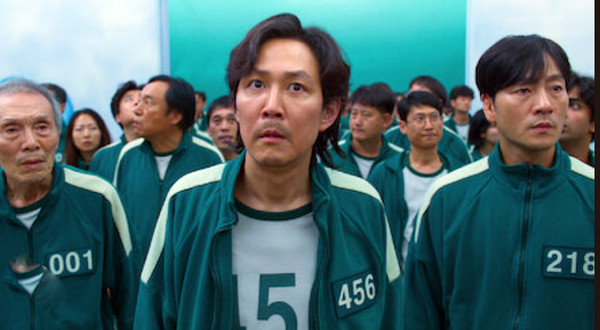

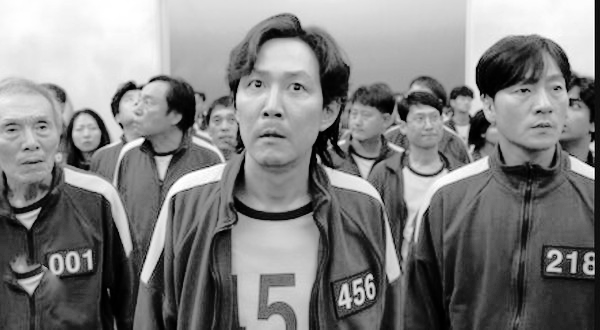

In [3]:
image_file = 'squid_game.jpg'
img = cv2.imread(image_file)

cv2_imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)
cv2_imshow(gray)

In [6]:
face_cascade_file = 'haarcascade_frontalface_alt.xml'
eyes_cascade_file = 'haarcascade_eye_tree_eyeglasses.xml'

face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()

if not face_cascade.load(cv2.samples.findFile(face_cascade_file)):
    print('Error loading face cascade')
    exit(0)    
if not eyes_cascade.load(cv2.samples.findFile(eyes_cascade_file)):
    print('Error loading eyes cascade')
    exit(0)    

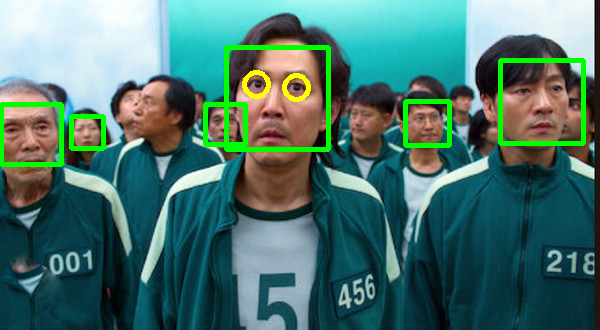

In [7]:
faces = face_cascade.detectMultiScale(gray)

for (x,y,w,h) in faces:
    center = (x + w//2, y + h//2)
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    face_rg = gray[y:y+h, x:x+w]
    eyes = eyes_cascade.detectMultiScale(face_rg)
    for (x2, y2, w2, h2) in eyes:
        eye_center = (x + x2 + w2//2, y + y2 + h2//2)
        radius = int(round((w2+h2)*0.25))
        img = cv2.circle(img, eye_center, radius, (0, 255, 255), 3)

cv2_imshow(img)

### 동영상에서 객체 탐지 : 얼굴(Face), 눈(Eyes)

- 파일 업로드 :  video.mp4

In [8]:
from google.colab import files
files.upload()

Saving video.mp4 to video.mp4


In [9]:
def detect(frame):
    IPython.display.clear_output(wait = True)
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 4)
        face_rg = frame_gray[y:y+h,x:x+w]
        eyes = eyes_cascade.detectMultiScale(face_rg)
        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv2.circle(frame, eye_center, radius, (255, 0, 0 ), 4)
    cv2_imshow(frame)

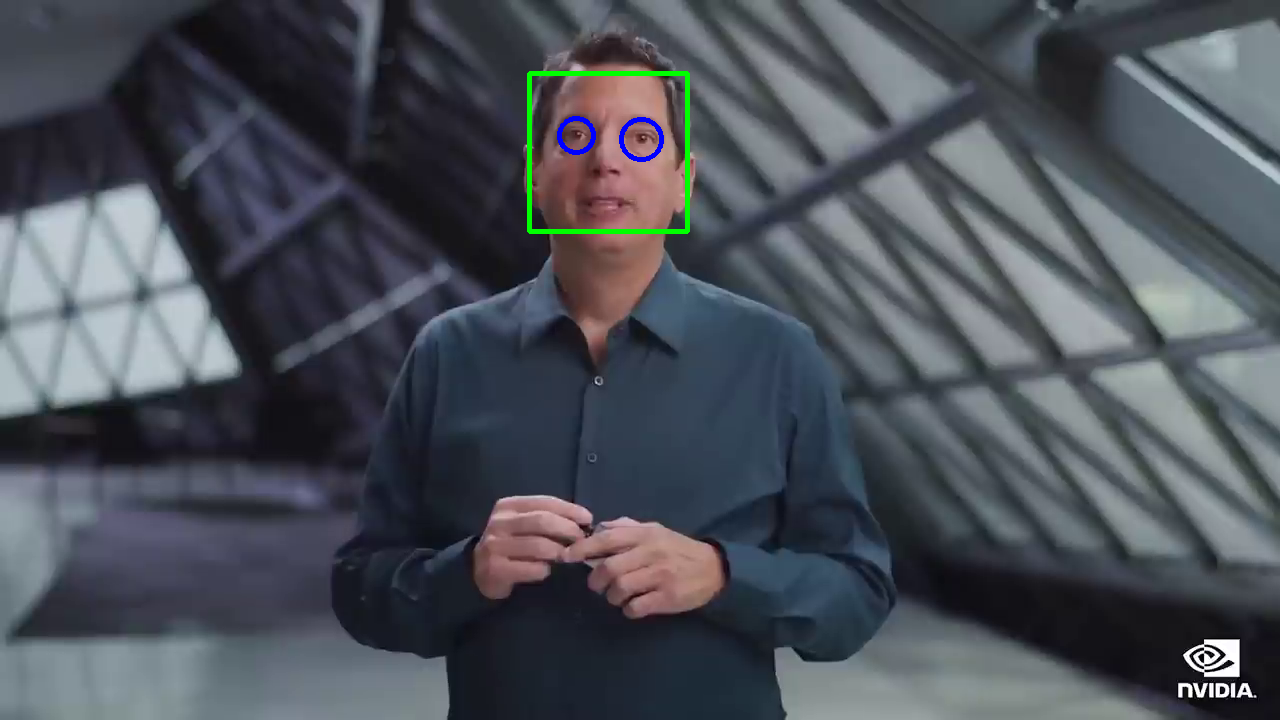

In [ ]:
vedio_file = 'video.mp4'
cap = cv2.VideoCapture(vedio_file)
if not cap.isOpened:
    print('Error opening video file')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('End')
        break
    detect(frame)